## Sleep Health Analysis

- H0: There is no relationship between sleep duration (X) and physical fitness duration (y)
- H1: There is a statistically significant relationship between variable X and variable y.

In [11]:
import numpy as np
import scipy as sp 
import pandas as pd 
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import cleaning as cl 
import importlib
importlib.reload(cl)

<module 'cleaning' from '/Users/chandlershortlidge/Desktop/Ironhack/sleep-heath-analysis/cleaning.py'>

In [2]:
health = pd.read_csv("/Users/chandlershortlidge/Desktop/Ironhack/sleep-heath-analysis/data/Sleep_health_and_lifestyle_dataset.csv")
health.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# view NA
health["Sleep Disorder"].isnull().sum()

np.int64(219)

In [5]:
# view unique to understand what NaNs are
health["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [6]:
# call function for cleaning all data
health = cl.clean_data(health)
# fill NaN values with "None"
# turn columns into lowercase
# replace " " with "_" in column nanes
# rename columns
# remove duplicates
health.head()

,id,gender,age,occupation,sleep_hours,sleep_quality,activity_min_per_day,stress_level,bmi_category,blood_pressure,rhr,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Text(0, 0.5, 'Sleep Hours per Night')

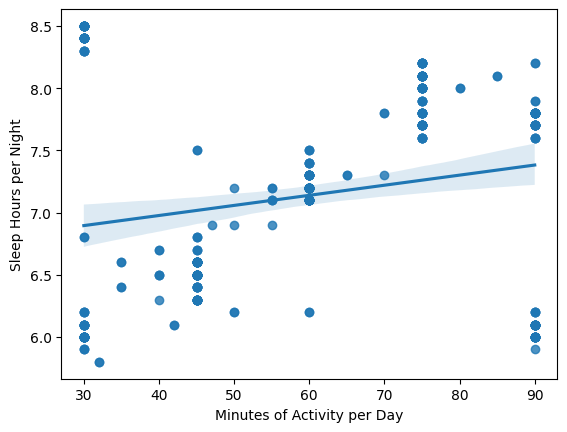

In [12]:
sns.regplot(
    data=health,
    x="activity_min_per_day",
    y="sleep_hours"
    
)
plt.xlabel("Minutes of Activity per Day")
plt.ylabel("Sleep Hours per Night")